<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **SpaceX  Falcon 9 First Stage Landing Prediction**


## Exploring and Preparing Data


Estimated time needed: **70** minutes


In this notebook, we will perform Exploratory Data Analysis and Feature Engineering.


## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


### Import Libraries and Define Auxiliary Functions


We will import the following libraries


In [1]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

In [2]:
## Exploratory Data Analysis


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [3]:
URL = "../../Data_Collecting&Wrangling/Wrangling/dataset_part_2.csv"
# "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
df=pd.read_csv(URL)
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


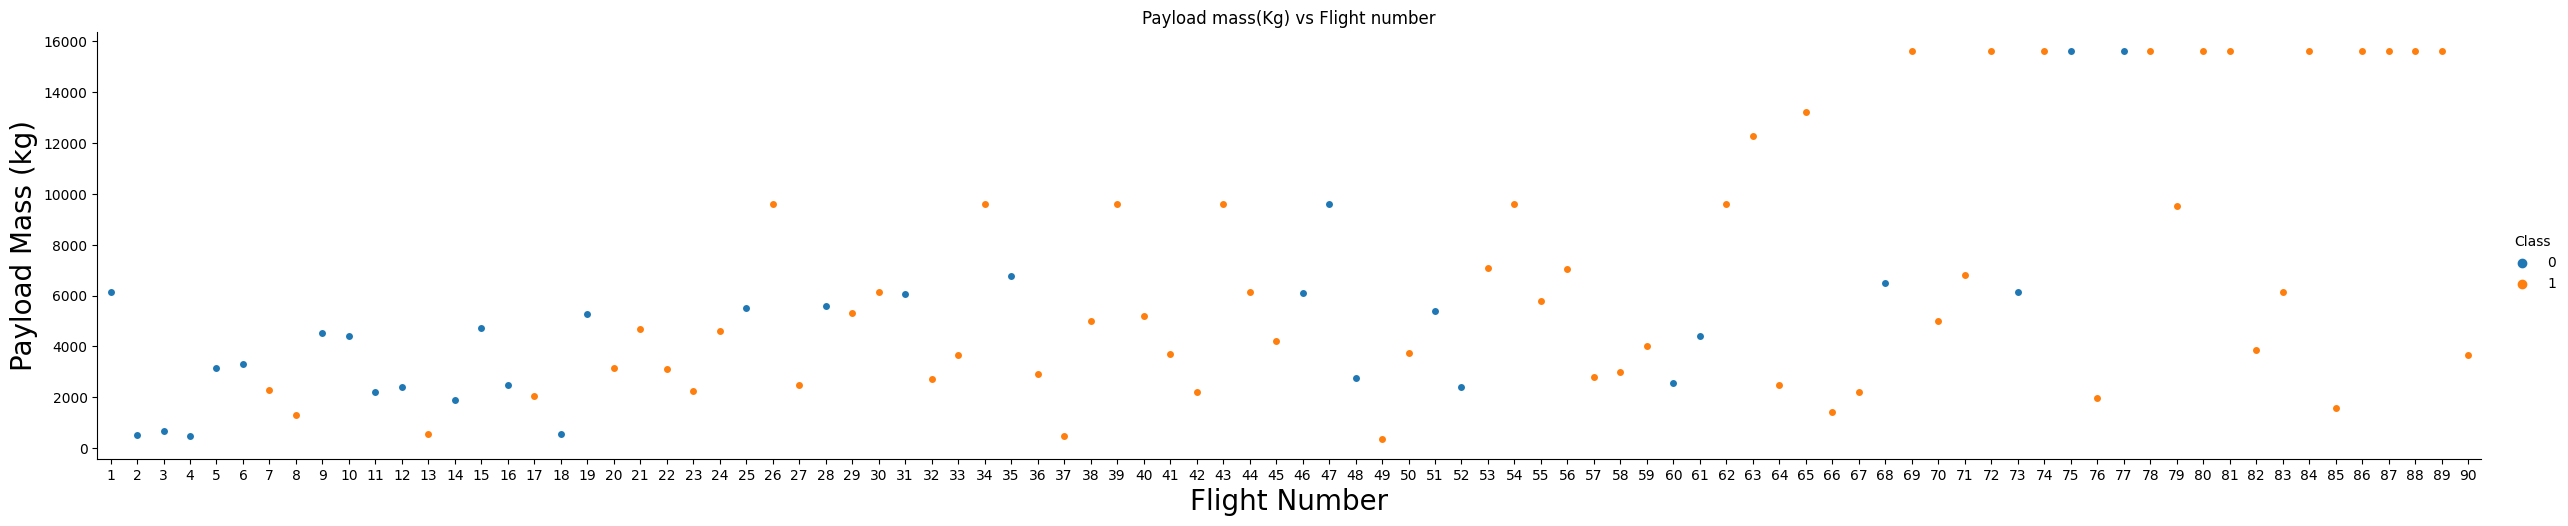

In [4]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Payload Mass (kg)",fontsize=20)
plt.title('Payload mass(Kg) vs Flight number')

plt.show()

In [5]:
# we get success rate for each launch site

In [6]:
df[['LaunchSite', 'Class']].groupby('LaunchSite', as_index=False).mean()

,LaunchSite,Class
0,CCSFS SLC 40,0.600000
1,KSC LC 39A,0.772727
2,VAFB SLC 4E,0.769231


We see that different launch sites have different success rates.  <code>CCAFS LC-40</code>, has a success rate of 60 %, while  <code>KSC LC-39A</code> and <code>VAFB SLC 4E</code> has a success rate of 77%.


Next, let's drill down to each site visualize its detailed launch records.


In [7]:
df[['LaunchSite', 'FlightNumber', 'Class']].groupby(['LaunchSite', 'Class'], as_index=False).count()

,LaunchSite,Class,FlightNumber
0,CCSFS SLC 40,0,22
1,CCSFS SLC 40,1,33
2,KSC LC 39A,0,5
3,KSC LC 39A,1,17
4,VAFB SLC 4E,0,3
5,VAFB SLC 4E,1,10


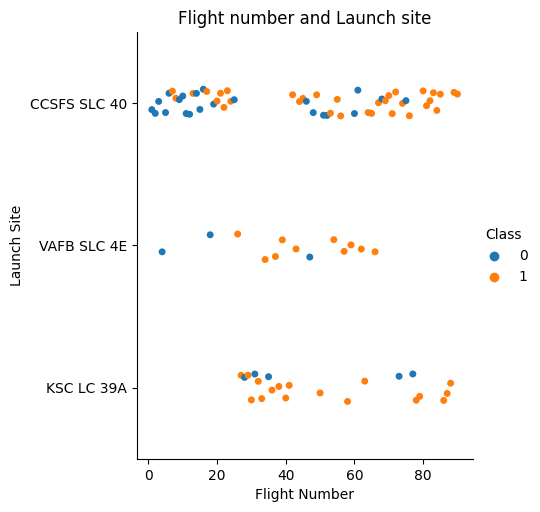

In [8]:
### TASK 1: Visualize the relationship between Flight Number and Launch Site
sns.catplot(data=df, x='FlightNumber', y='LaunchSite', hue='Class')
plt.xlabel('Flight Number')
plt.ylabel('Launch Site')
plt.title('Flight number and Launch site')
plt.show()

In [9]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value

In [10]:
#mean of Class(success rate) and PayloadMass in each LaunchSite
df[['PayloadMass', 'Class', 'LaunchSite']].groupby('LaunchSite', as_index=False).mean()

,LaunchSite,PayloadMass,Class
0,CCSFS SLC 40,5563.403508,0.600000
1,KSC LC 39A,7644.504332,0.772727
2,VAFB SLC 4E,5919.461538,0.769231


We also want to observe if there is any relationship between launch sites and their payload mass.


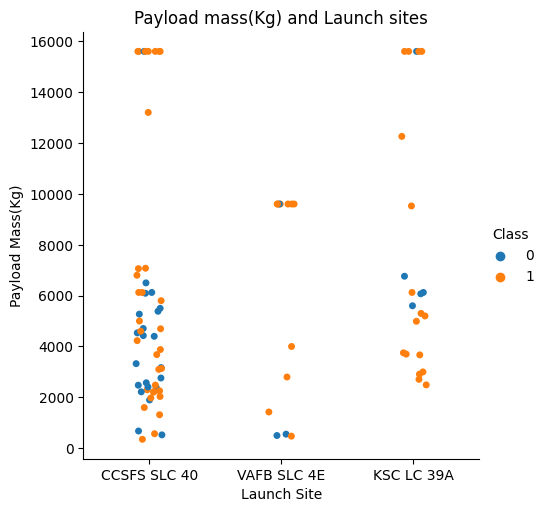

In [11]:
### TASK 2: Visualize the relationship between Payload and Launch Site
sns.catplot(data=df, x='LaunchSite', y='PayloadMass', hue='Class')
plt.xlabel('Launch Site')
plt.ylabel('Payload Mass(Kg)')
plt.title('Payload mass(Kg) and Launch sites')

plt.show()

Now if you observe Payload Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).


Next, we want to visually check if there are any relationship between success rate and orbit type.


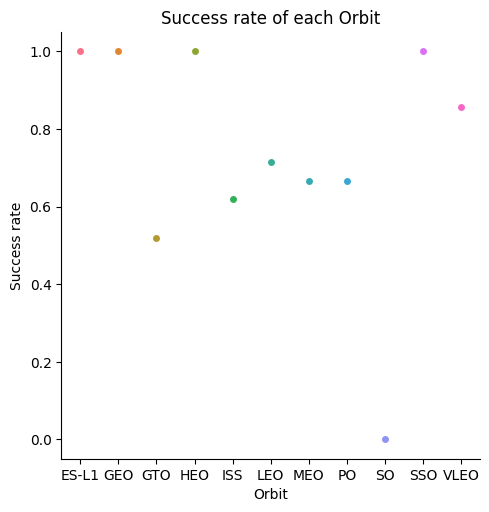

In [12]:
### TASK  3: Visualize the relationship between success rate of each orbit type
df_mean = df[['Orbit', 'Class']].groupby('Orbit', as_index=False).mean()
sns.catplot(data=df_mean, x='Orbit', y='Class', hue='Orbit')
plt.ylabel('Success rate')
plt.xlabel('Orbit')
# plt.ylim(0,)
plt.title('Success rate of each Orbit')
plt.show()

Let's create a `bar chart` for the sucess rate of each orbit


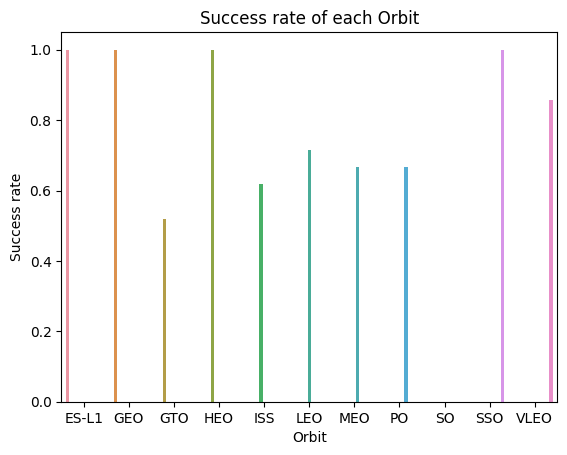

In [13]:
ax = sns.barplot(data=df_mean, x='Orbit', y='Class', hue='Orbit')
plt.title('Success rate of each Orbit')
# remove legend
ax.get_legend().remove()
plt.ylabel('Success rate')
plt.xlabel('Orbit')
plt.show()

By Analyzing the ploted bar chart we find that **SSO, HEO, GEO, ES-L1, VLEO** have highest succes rate.


For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


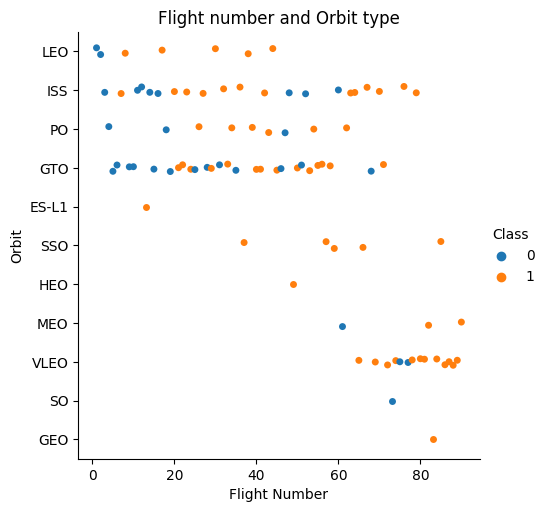

In [14]:
### TASK  4: Visualize the relationship between FlightNumber and Orbit type
sns.catplot(data=df, x='FlightNumber', y='Orbit', hue='Class')
plt.title('Flight number and Orbit type')
plt.ylabel('Orbit')
plt.xlabel('Flight Number')
plt.show()

You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.


Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type


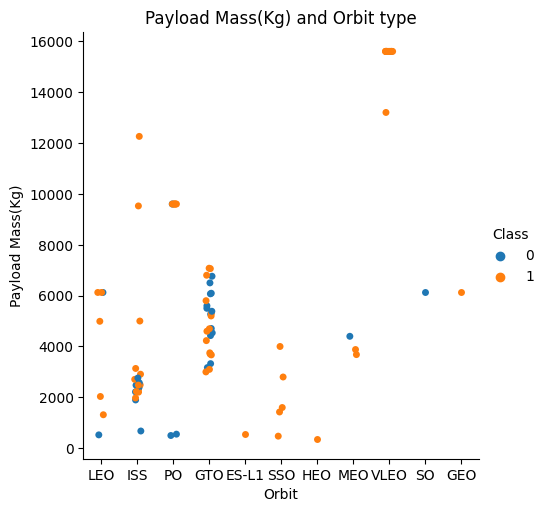

In [15]:
### TASK  5: Visualize the relationship between Payload and Orbit type
sns.catplot(data=df, x='Orbit', y='PayloadMass', hue='Class')
plt.title('Payload Mass(Kg) and Orbit type')
plt.xlabel('Orbit')
plt.ylabel('Payload Mass(Kg)')
plt.show()

In [16]:
df[['Orbit','Class']][df['PayloadMass']>10000].groupby(['Orbit'], as_index=False).mean()

,Orbit,Class
0,ISS,1.000000
1,VLEO,0.857143


With heavy payloads the successful landing or positive landing rate are more for Polar,LEO,VLEO and ISS.

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.


In [17]:
### TASK  6: Visualize the launch success yearly trend


You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend.


The function to get the year from the date:


In [18]:
# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['YDate'] = year
df.head()
    

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class,YDate
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0,2010
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0,2012
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0,2013
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0,2013
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0,2013


In [19]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate to see trend of success_rate yearly

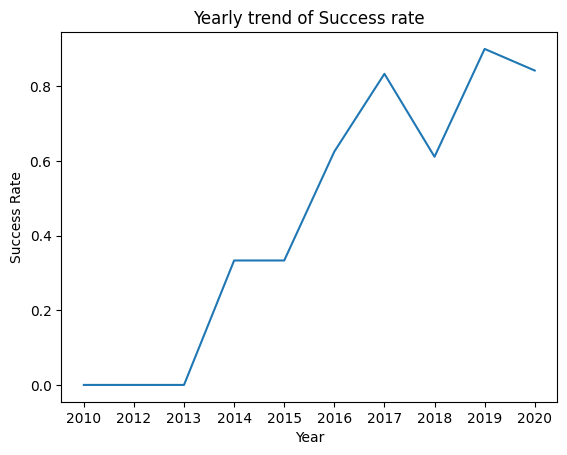

In [20]:
df_mean_year = df[['YDate', 'Class']].groupby('YDate', as_index=False).mean()
df_mean_year.columns = ['YDate', 'Success_Rate']
plt.plot(df_mean_year['YDate'],df_mean_year['Success_Rate'])
plt.ylabel('Success Rate')
plt.xlabel('Year')
plt.title('Yearly trend of Success rate')
plt.show()

you can observe that the sucess rate since 2013 kept increasing till 2020


In [21]:
## Features Engineering


By now, we obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future.


In [22]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6123.547647,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [23]:
### TASK  7: Create dummy variables to categorical columns


We have to change categorical variable to numeric variable to use in predictive model

We use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Our result dataframe will include all features including the encoded ones.


In [24]:
features_one_hot = pd.get_dummies(features[['Orbit', 'LaunchSite', 'LandingPad', 'Serial']])
features_one_hot = pd.concat([features, features_one_hot], axis=1)
features_one_hot.drop(['Orbit', 'LaunchSite', 'LandingPad', 'Serial'], axis=1, inplace=True)
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6123.547647,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,677.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,500.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now that our <code>features_one_hot</code> dataframe only contains numbers cast the entire dataframe to variable type <code>float64</code>


In [25]:
### TASK  8: Cast all numeric columns to `float64` for our machine learning model and scalar
features_one_hot = features_one_hot.astype('float64')

In [26]:
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6123.547647,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


we can see type of all columns change to `float64`

In [27]:
features_one_hot.dtypes

FlightNumber    float64
PayloadMass     float64
Flights         float64
GridFins        float64
Reused          float64
                 ...   
Serial_B1056    float64
Serial_B1058    float64
Serial_B1059    float64
Serial_B1060    float64
Serial_B1062    float64
Length: 80, dtype: object

We can now export it to a <b>CSV</b> for the next section we use our dataset for learning our predictive algorithmes.


In [28]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)

<code>features_one_hot.to_csv('dataset_part\_3.csv', index=False)</code>


## Author

Moein (mrpintime)

### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
